In [2]:
import datetime
import pandas_datareader as pdr
import pandas as pd

api_key='9418f41a9f45479a17f3da8ea0a63db8f4cd60cb'


tickers = ['FNILX', 'NASDX', 'QQQ', 'VOO']


start="2020-1-1"
end="2021-7-1"

df = pdr.tiingo.TiingoDailyReader(tickers, start=start, end=end, api_key=api_key)


all_data = df.read()
all_data

C:\Users\nagay\Anaconda3\envs\CALM2\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


close     high       low    open   volume  \
symbol date                                                                    
FNILX  2020-01-02 00:00:00+00:00   11.34   11.340   11.3400   11.34        0   
       2020-01-03 00:00:00+00:00   11.26   11.260   11.2600   11.26        0   
       2020-01-06 00:00:00+00:00   11.30   11.300   11.3000   11.30        0   
       2020-01-07 00:00:00+00:00   11.27   11.270   11.2700   11.27        0   
       2020-01-08 00:00:00+00:00   11.33   11.330   11.3300   11.33        0   
...                                  ...      ...       ...     ...      ...   
VOO    2021-06-25 00:00:00+00:00  393.50  393.920  392.5400  392.90  2863066   
       2021-06-28 00:00:00+00:00  394.32  394.450  392.8300  394.03  2418472   
       2021-06-29 00:00:00+00:00  393.16  393.940  392.6600  393.35  2927626   
       2021-06-30 00:00:00+00:00  393.52  394.131  392.7200  392.72  3795925   
       2021-07-01 00:00:00+00:00  395.74  395.850  394.2062  394.30  3414515   

                                    adjClose     adjHigh      adjLow  \
symbol date                                                            
FNILX  2020-01-02 00:00:00+00:00   11.092292   11.092292   11.092292   
       2020-01-03 00:00:00+00:00   11.014040   11.014040   11.014040   
       2020-01-06 00:00:00+00:00   11.053166   11.053166   11.053166   
       2020-01-07 00:00:00+00:00   11.023821   11.023821   11.023821   
       2020-01-08 00:00:00+00:00   11.082511   11.082511   11.082511   
...                                      ...         ...         ...   
VOO    2021-06-25 00:00:00+00:00  384.954896  385.365775  384.015743   
       2021-06-28 00:00:00+00:00  385.757089  385.884266  384.299445   
       2021-06-29 00:00:00+00:00  385.926234  386.691883  385.435434   
       2021-06-30 00:00:00+00:00  386.279611  386.879369  385.494330   
       2021-07-01 00:00:00+00:00  388.458765  388.566741  386.953185   

                                     adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                    
FNILX  2020-01-02 00:00:00+00:00   11.092292          0   0.0000          1.0  
       2020-01-03 00:00:00+00:00   11.014040          0   0.0000          1.0  
       2020-01-06 00:00:00+00:00   11.053166          0   0.0000          1.0  
       2020-01-07 00:00:00+00:00   11.023821          0   0.0000          1.0  
       2020-01-08 00:00:00+00:00   11.082511          0   0.0000          1.0  
...                                      ...        ...      ...          ...  
VOO    2021-06-25 00:00:00+00:00  384.367925    2863066   0.0000          1.0  
       2021-06-28 00:00:00+00:00  385.473387    2418472   0.0000          1.0  
       2021-06-29 00:00:00+00:00  386.112739    2927626   1.3329          1.0  
       2021-06-30 00:00:00+00:00  385.494330    3795925   0.0000          1.0  
       2021-07-01 00:00:00+00:00  387.045260    3414515   0.0000          1.0  

[1512 rows x 12 columns]

In [3]:
all_data.to_csv('all_data.csv')

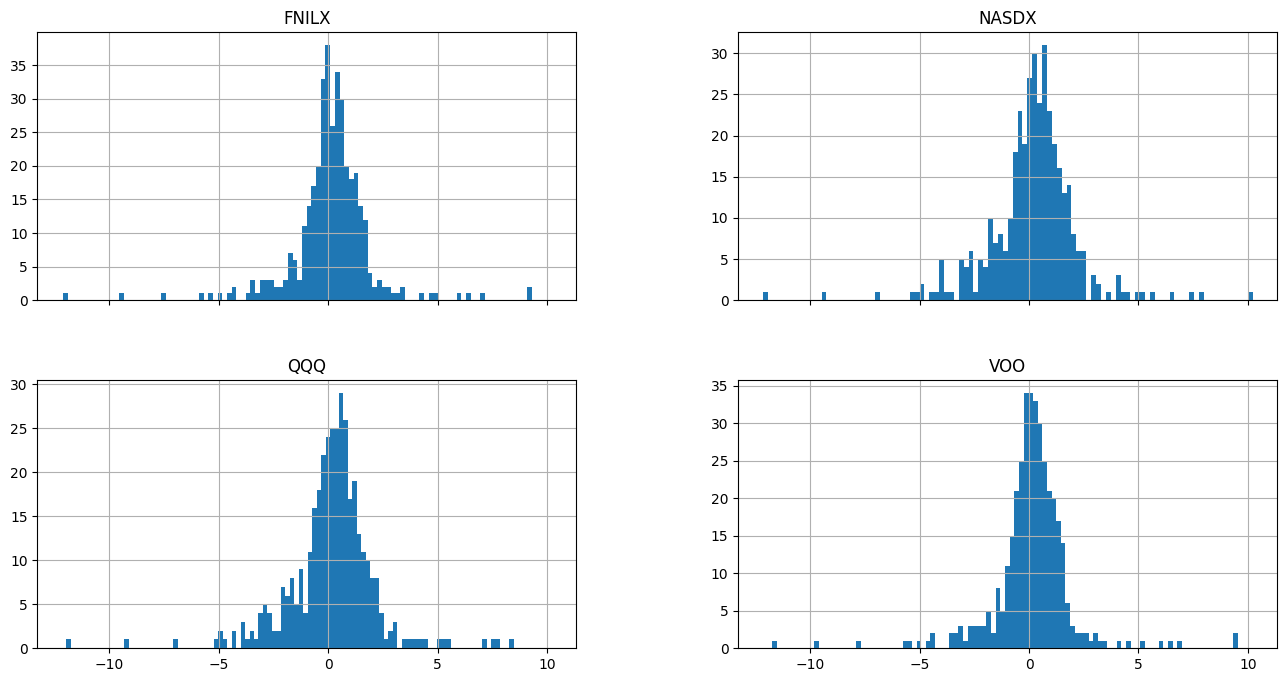

In [5]:
# Import matplotlib
import matplotlib.pyplot as plt 
from matplotlib import style
  
# Isolate the `Adj Close` values and transform the DataFrame
daily_close_px = all_data[['adjClose']].reset_index().pivot('date', 'symbol', 'adjClose')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = (daily_close_px.pct_change() * 100)

# Plot the distributions
daily_pct_change.hist(bins=100, sharex=True, figsize=(16,8))
plt.style.use('dark_background')

# Show the resulting plot
plt.show()

## Summary

Here are four histograms representing the percentage change in closing prices of major index funds between the year 2020 and 2021. The index funds depicted are Fidelity ZERO Large Cap Index (FNILX), Shelton NASDAQ-100 Index Direct(NASDC), Invesco QQQ Trust ETF(QQQ) and Vanguard S&P 500 ETF(VOO). It depicts the volatility and skew of the price changes in closing prices. The x axis represents percentage change and the y axis represents the frequency. Looking at the data, the most volatile index fund is NASDX and the least volatile is VOO. QQQ was the most skewed towards having a positive percentage change in closing prices. From this it could be implied that QQQ saw greater growth in closing prices over the cause of the year. I would suggest that for low-risk investors that they should invest in VOO and high-risk investors could take a chance at NASDX which tracks the primarily tech companies in the Nasdaq-100 index. NASDX could have been more volatile due to the tech company boom during 2020-2021 during the pandemic. I state this as during the pandemic many investors ran to invest in stay at home tech stocks like netflix and zoom. To make this data analysis better the median should be calculated. All are negatively skew. I utilised different number of bins to get different insights which confirm my analysis.